<a href="https://colab.research.google.com/github/tiaracantiq/gitgithub/blob/main/Nike_Product_Analysist_U_S_2020_2021_with_Regresi_Linear_and_Regresi_Logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Calling Lybrary

In [1]:
# import library yang dibutuhkan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# import library untuk ignore future warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Import dataset to gdrive

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Calling Dataset on my grive

In [6]:
import pandas as pd

file_path = '/content/drive/My Drive/Praktikum SIAB/Dataset Responsi/Nike Dataset.csv'
df = pd.read_csv(file_path, encoding='latin1')

# Set pandas max columns jumlah kolom dari data
pd.set_option('display.max_columns', len(df.columns))
pd.set_option('display.max_rows', 110)

# Menampilkan 5 data teratas
df.head()

,ï»¿Invoice Date,Product,Region,Retailer,Sales Method,State,Price per Unit,Total Sales,Units Sold
0,01-01-2020,Men's Street Footwear,Northeast,Foot Locker,In-store,New York,50,6000,120
1,02-01-2020,Men's Athletic Footwear,Northeast,Foot Locker,In-store,New York,50,5000,100
2,03-01-2020,Women's Street Footwear,Northeast,Foot Locker,In-store,New York,40,4000,100
3,04-01-2020,Women's Athletic Footwear,Northeast,Foot Locker,In-store,New York,45,3825,85
4,05-01-2020,Men's Apparel,Northeast,Foot Locker,In-store,New York,60,5400,90


In [8]:
# dimensi dataset
row, columns = df.shape

print(f'Listings terdiri atas {row} baris dan {columns} kolom')

Listings terdiri atas 9360 baris dan 9 kolom


Preproccessing

In [10]:
# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9360 entries, 0 to 9359
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ï»¿Invoice Date  9360 non-null   object
 1   Product          9360 non-null   object
 2   Region           9360 non-null   object
 3   Retailer         9360 non-null   object
 4   Sales Method     9360 non-null   object
 5   State            9360 non-null   object
 6   Price per Unit   9360 non-null   int64 
 7   Total Sales      9360 non-null   int64 
 8   Units Sold       9360 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 658.3+ KB


In [13]:
# dataset info
df.nunique()

# descriptive statistik listings
df.describe()

,Price per Unit,Total Sales,Units Sold
count,9360.000000,9360.00000,9360.000000
mean,44.739209,921.93109,25.852991
std,14.506338,1413.84279,21.591922
min,7.000000,0.00000,0.000000
25%,35.000000,42.00000,11.000000
50%,45.000000,95.00000,18.000000
75%,55.000000,1463.00000,35.000000
max,110.000000,8250.00000,128.000000


Proccssing and Cleaning Data

In [16]:
# Info dataset
df.info()

# Rename the column with the BOM character
df = df.rename(columns={'ï»¿Invoice Date': 'Invoice Date'})

# cek data pada kolom Invoice Date
df['Invoice Date'].head()

# Parsing kolom `Invoice Date` menjadi tipe data datetime
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'], format='%d-%m-%Y')

# Tampilkan data tanggal setelah diconvert
df['Invoice Date']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9360 entries, 0 to 9359
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ï»¿Invoice Date  9360 non-null   object
 1   Product          9360 non-null   object
 2   Region           9360 non-null   object
 3   Retailer         9360 non-null   object
 4   Sales Method     9360 non-null   object
 5   State            9360 non-null   object
 6   Price per Unit   9360 non-null   int64 
 7   Total Sales      9360 non-null   int64 
 8   Units Sold       9360 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 658.3+ KB


,Invoice Date
0,2020-01-01
1,2020-01-02
2,2020-01-03
3,2020-01-04
4,2020-01-05
...,...
9355,2021-07-06
9356,2021-04-05
9357,2021-05-05
9358,2021-06-04


Handling Missing Value

In [20]:
# Mendapatkan jumlah missing value tiap kolom
# dan mengurutkan dari yang terbesar ke terkecil
nan_col = df.isna().sum().sort_values(ascending = False)
nan_col

# Mendapatkan persentase missing value tiap kolom
n_data = len(df)

percent_nan_col = (nan_col/n_data) * 100
percent_nan_col

,0
Invoice Date,0.0
Product,0.0
Region,0.0
Retailer,0.0
Sales Method,0.0
State,0.0
Price per Unit,0.0
Total Sales,0.0
Units Sold,0.0


Checking Duplicate

In [22]:
# cek jika terdapat data duplikat
df[df.duplicated()]

,Invoice Date,Product,Region,Retailer,Sales Method,State,Price per Unit,Total Sales,Units Sold


Unique State

In [24]:
# cek jumlah data unik pada State
state_unique = df['State'].nunique()

print(f'Jumlah data unik pada kolom State: {state_unique}')

# cek data unik pada State
df['State'].unique()

Jumlah data unik pada kolom State: 48


array(['New York', 'Texas', 'California', 'Illinois', 'Pennsylvania',
       'Nevada', 'Colorado', 'Washington', 'Florida', 'Minnesota',
       'Montana', 'Tennessee', 'Louisiana', 'Virginia', 'Wyoming',
       'Oregon', 'Utah', 'Iowa', 'Michigan', 'Missouri', 'North Dakota',
       'Indiana', 'Wisconsin', 'Massachusetts', 'New Hampshire',
       'Vermont', 'Connecticut', 'Delaware', 'Maryland', 'Rhode Island',
       'West Virginia', 'New Jersey', 'Maine', 'Georgia', 'Arizona',
       'Idaho', 'New Mexico', 'Ohio', 'Kansas', 'Nebraska',
       'South Dakota', 'Alabama', 'Mississippi', 'Kentucky',
       'North Carolina', 'South Carolina', 'Oklahoma', 'Arkansas'],
      dtype=object)

Checking Region Coloum

In [26]:
# cek jumlah data unik pada Region
region_unique = df['Region'].nunique()

print(f'Jumlah data unik pada kolom Region: {region_unique}')

# cek data unik pada Region
df['Region'].unique()

Jumlah data unik pada kolom Region: 5


array(['Northeast', 'South', 'West', 'Midwest', 'Southeast'], dtype=object)

HandlongRetailer Coloum

In [28]:
# cek jumlah data unik pada State
retailer_unique = df['Retailer'].nunique()

print(f'Jumlah data unik pada kolom Retailer: {retailer_unique}')

# cek data unik pada State
df['Retailer'].unique()

Jumlah data unik pada kolom Retailer: 6


array(['Foot Locker', 'Walmart', 'Sports Direct', 'West Gear', "Kohl's",
       'Amazon'], dtype=object)

Handling Coloum Sales Method

In [30]:
# cek jumlah data unik pada Sales Method
salesmethod_unique = df['Sales Method'].nunique()

print(f'Jumlah data unik pada kolom Sales Method: {salesmethod_unique}')
# cek data unik pada State
df['Sales Method'].unique()

Jumlah data unik pada kolom Sales Method: 3


array(['In-store', 'Outlet', 'Online'], dtype=object)

Handling Outlier

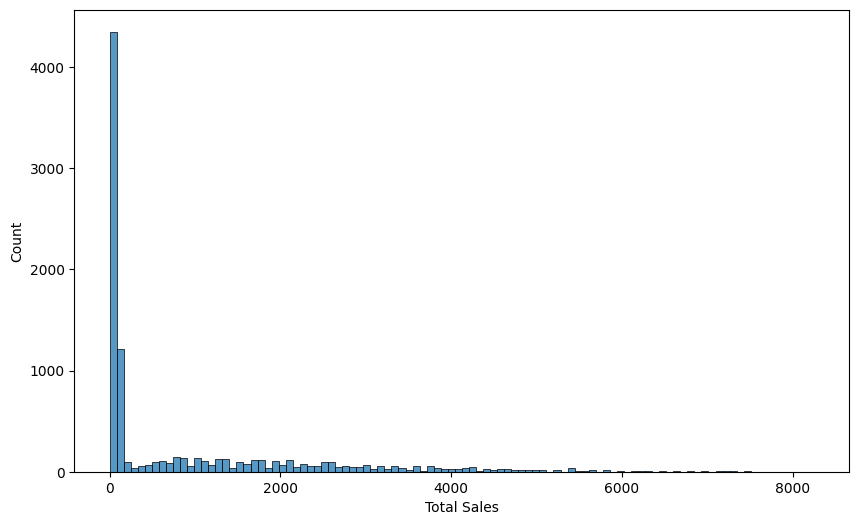

In [32]:
# Buat figure & axes
fig, ax = plt.subplots(figsize = (10, 6))

# Buat histogram plot price
sns.histplot(data = df,
             x = "Total Sales",
             bins = 100,
             ax = ax)

plt.show()

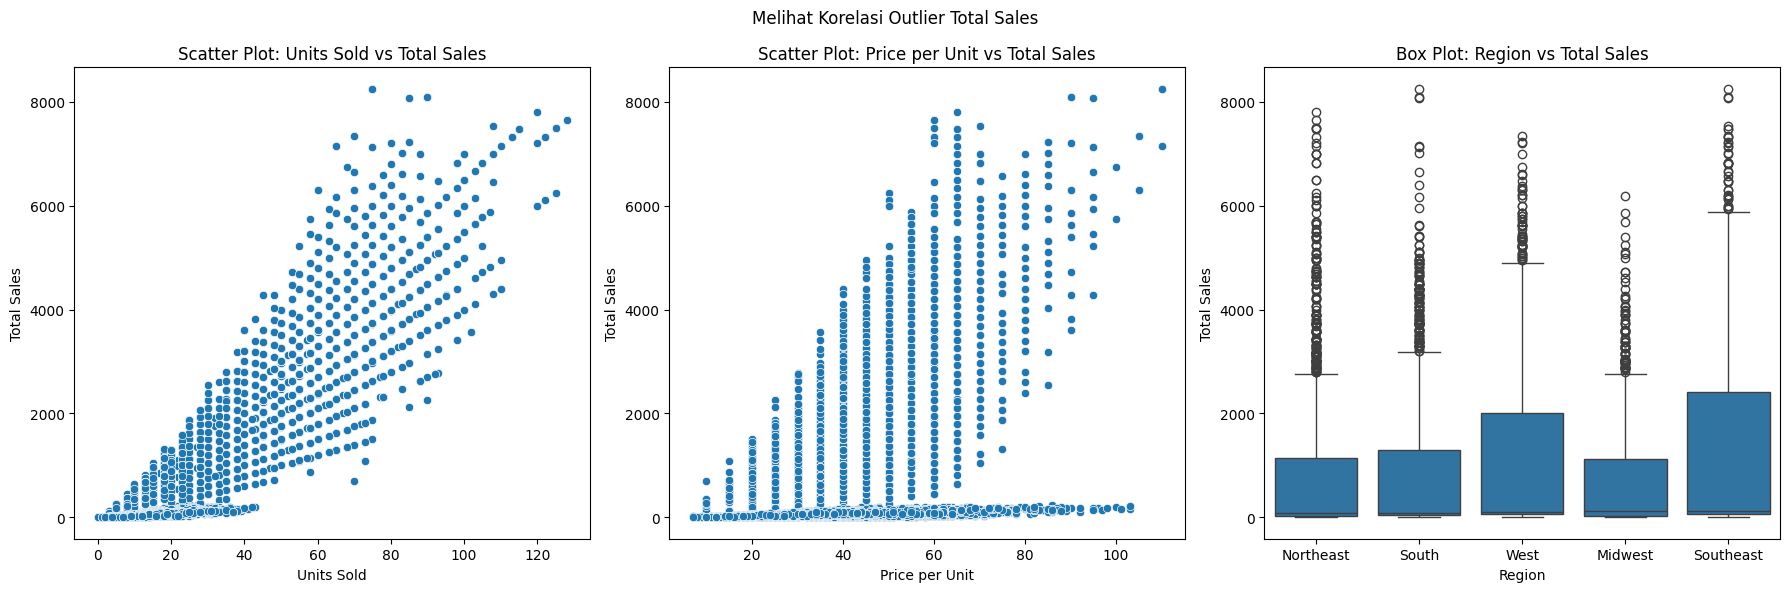

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Melihat Korelasi Outlier Total Sales')

# Scatter plot: Units Sold vs Total Sales
sns.scatterplot(data=df, x='Units Sold', y='Total Sales', ax=axes[0])
axes[0].set_title('Scatter Plot: Units Sold vs Total Sales')

# Scatter plot: Price per Unit vs Total Sales
sns.scatterplot(data=df, x='Price per Unit', y='Total Sales', ax=axes[1])
axes[1].set_title('Scatter Plot: Price per Unit vs Total Sales')

# Box plot: Region vs Total Sales
sns.boxplot(data=df, x='Region', y='Total Sales', ax=axes[2])
axes[2].set_title('Box Plot: Region vs Total Sales')

plt.tight_layout()
plt.show()

In [36]:
# Deskripsi statistik dari kolom price
df["Total Sales"].describe()

,Total Sales
count,9360.00000
mean,921.93109
std,1413.84279
min,0.00000
25%,42.00000
50%,95.00000
75%,1463.00000
max,8250.00000


In [38]:
# Cari Q1 & Q3
Q1 = df['Total Sales'].quantile(0.25)
Q3 = df['Total Sales'].quantile(0.75)

print(f"Nilai Q1 : {Q1:.2f}")
print(f"Nilai Q3 : {Q3:.2f}")

Nilai Q1 : 42.00
Nilai Q3 : 1463.00


In [39]:
# Cari IQR & BATAS MAXIMUM
IQR = Q3 - Q1
max_bound = Q3 + 1.5*IQR

print(f"Nilai IQR : {IQR:.2f}")
print(f"Maximum Boundary : {max_bound:.2f}")

Nilai IQR : 1421.00
Maximum Boundary : 3594.50


In [41]:
# Filter data tanpa outlier
df = df[df["Total Sales"] < max_bound]

# Validasi hasil filter
df['Total Sales'].describe()

,Total Sales
count,8695.000000
mean,629.320874
std,932.703700
min,0.000000
25%,39.000000
50%,82.000000
75%,1013.000000
max,3578.000000


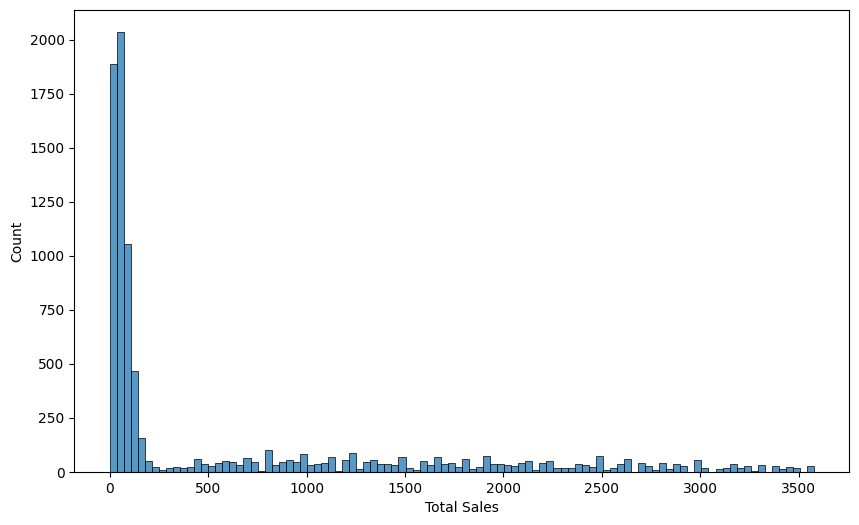

In [43]:
# Buat figure & axes
fig, ax = plt.subplots(figsize = (10, 6))

# Buat histogram plot price
sns.histplot(data = df,
             x = "Total Sales",
             bins = 100,
             ax = ax)

plt.show()

Total Sales Corelations

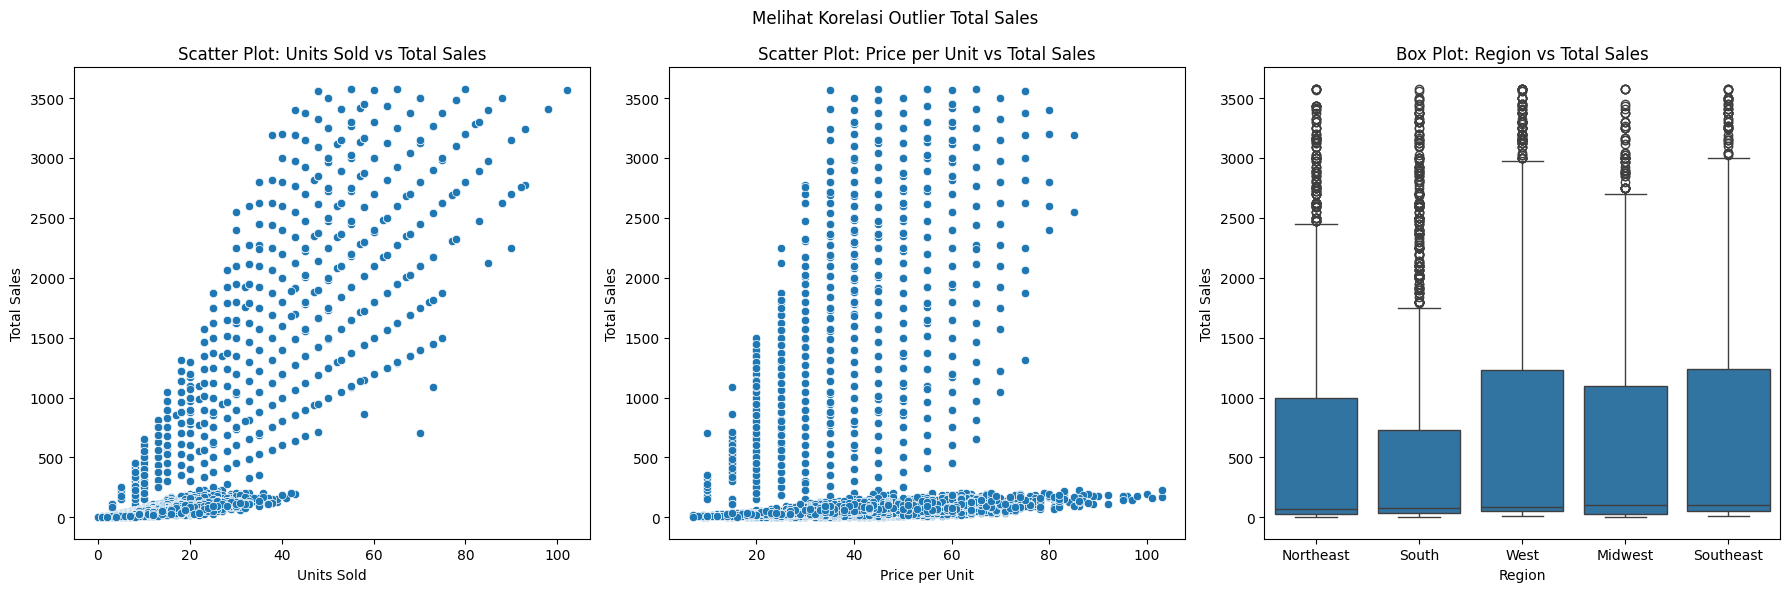

In [45]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Melihat Korelasi Outlier Total Sales')

# Scatter plot: Units Sold vs Total Sales
sns.scatterplot(data=df, x='Units Sold', y='Total Sales', ax=axes[0])
axes[0].set_title('Scatter Plot: Units Sold vs Total Sales')

# Scatter plot: Price per Unit vs Total Sales
sns.scatterplot(data=df, x='Price per Unit', y='Total Sales', ax=axes[1])
axes[1].set_title('Scatter Plot: Price per Unit vs Total Sales')

# Box plot: Region vs Total Sales
sns.boxplot(data=df, x='Region', y='Total Sales', ax=axes[2])
axes[2].set_title('Box Plot: Region vs Total Sales')

plt.tight_layout()
plt.show()

Unit Solds Coloum

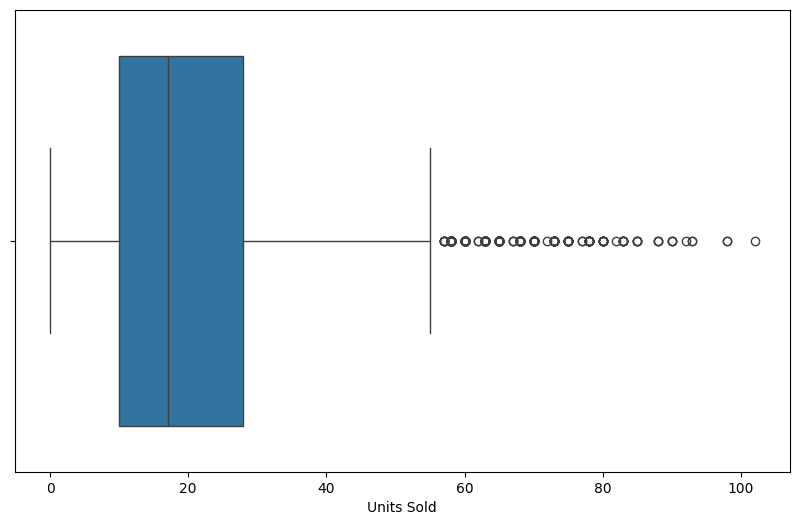

In [47]:
# Buat figure & axes
fig, ax = plt.subplots(figsize = (10, 6))

# Buat histogram plot price
sns.boxplot(data = df,
             x = "Units Sold",
             ax = ax)

plt.show()

In [49]:
# Deskripsi statistik dari kolom price
df["Units Sold"].describe()

,Units Sold
count,8695.000000
mean,21.942266
std,16.381610
min,0.000000
25%,10.000000
50%,17.000000
75%,28.000000
max,102.000000


Looking for outlier

In [51]:
# Cari Q1 & Q3
Q1 = df['Units Sold'].quantile(0.25)
Q3 = df['Units Sold'].quantile(0.75)

print(f"Nilai Q1 : {Q1:.2f}")
print(f"Nilai Q3 : {Q3:.2f}")

Nilai Q1 : 10.00
Nilai Q3 : 28.00


In [52]:
# Cari IQR & BATAS MAXIMUM
IQR = Q3 - Q1
max_bound = Q3 + 1.5*IQR

print(f"Nilai IQR : {IQR:.2f}")
print(f"Maximum Boundary : {max_bound:.2f}")

Nilai IQR : 18.00
Maximum Boundary : 55.00


In [54]:
# Filter data tanpa outlier
df = df[df["Units Sold"] < max_bound]

In [56]:
# Validasi hasil filter
df['Units Sold'].describe()

,Units Sold
count,8143.000000
mean,19.082893
std,12.364644
min,0.000000
25%,10.000000
50%,16.000000
75%,25.000000
max,53.000000


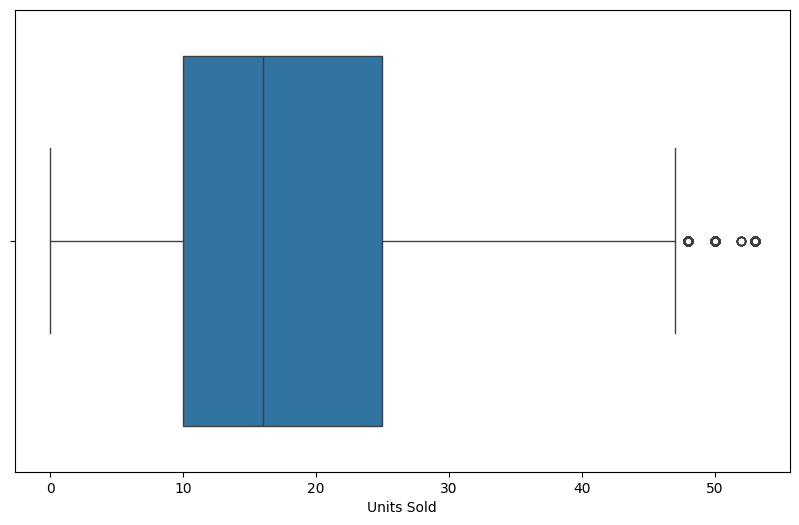

In [58]:
# Buat figure & axes
fig, ax = plt.subplots(figsize = (10, 6))

# Buat histogram plot price
sns.boxplot(data = df,
             x = "Units Sold",
             ax = ax)

plt.show()

In [60]:
df.to_csv('nike_datasets_ready.csv', index=False)